## **Regresion Lineal**

## **1.Instalaciones y Importaciones**

In [83]:
!pip install lazypredict
import pandas as pd
import missingno as msno
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import shap
import lightgbm as lgb
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from lazypredict.Supervised import LazyRegressor
from scipy.stats import randint, uniform
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_percentage_error
from sklearn.decomposition import PCA



## **2.Subimos Database**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving internal-link.csv to internal-link.csv


## **3. Abrimos Database**

In [3]:
df = pd.read_csv('internal-link.csv', sep=',')
pd.set_option('display.max_columns', None)
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92
1,18,male,33.77,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
3,33,male,22.70,0,no,northwest,21984.47
4,32,male,28.88,0,no,northwest,3866.86
5,31,female,25.74,0,no,southeast,3756.62
6,46,female,33.44,1,no,southeast,8240.59
7,37,female,27.74,3,no,northwest,7281.51
8,37,male,29.83,2,no,northeast,6406.41
9,60,female,25.84,0,no,northwest,28923.14


In [4]:
df.shape

(1338, 7)

## **4.Descripción de Variables:**

In [5]:
for col in df.columns:
    print(f"\nColumna: {col}")

    # Conteos absolutos
    conteos = df[col].value_counts(dropna=False)

    # Porcentajes
    porcentajes = df[col].value_counts(normalize=True, dropna=False) * 100

    # Combinar en un solo DataFrame
    resumen = pd.DataFrame({
        'Conteo': conteos,
        'Porcentaje (%)': porcentajes.round(2)
    })

    print(resumen)


Columna: age
     Conteo  Porcentaje (%)
age                        
18       69            5.16
19       68            5.08
46       29            2.17
52       29            2.17
50       29            2.17
47       29            2.17
48       29            2.17
51       29            2.17
45       29            2.17
20       29            2.17
24       28            2.09
27       28            2.09
28       28            2.09
25       28            2.09
23       28            2.09
49       28            2.09
54       28            2.09
53       28            2.09
22       28            2.09
21       28            2.09
26       28            2.09
31       27            2.02
41       27            2.02
44       27            2.02
43       27            2.02
42       27            2.02
29       27            2.02
30       27            2.02
40       27            2.02
32       26            1.94
33       26            1.94
57       26            1.94
34       26            1.94
55    

## **5. Cribado Manual**

## 5.1 No tenemos que reemplazar Valores Atipicos por NAN

## 5.2 Identificar columnas con columnas constantes

In [6]:
unicos = df.nunique()
df[unicos[unicos==1].index]
df[unicos[unicos==1].index].head(5)

""
0
1
2
3
4


## 5.3. Eliminamos filas y columnas duplicadas. Me sale fila duplicada. Pero no la elimino porque asumo hay dos personas diferentes de 19 años hombre con bmi 30.59, sin hijos, no fumador  y de la zona de Nortwest.

In [7]:
df.duplicated().sum()

np.int64(1)

In [8]:
df[df.duplicated(keep=False)]


,age,sex,bmi,children,smoker,region,charges
195,19,male,30.59,0,no,northwest,1639.56
581,19,male,30.59,0,no,northwest,1639.56


In [9]:
df.T.duplicated().sum()

np.int64(0)

In [10]:
df.T.duplicated(keep=False)

,0
age,False
sex,False
bmi,False
children,False
smoker,False
region,False
charges,False


## 5.4 Eliminar Columnas redundantes. No eliminamos ninguna.

In [11]:
pd.set_option('display.max_columns', None)
df.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.92
1,18,male,33.77,1,no,southeast,1725.55
2,28,male,33.00,3,no,southeast,4449.46
3,33,male,22.70,0,no,northwest,21984.47
4,32,male,28.88,0,no,northwest,3866.86
5,31,female,25.74,0,no,southeast,3756.62
6,46,female,33.44,1,no,southeast,8240.59
7,37,female,27.74,3,no,northwest,7281.51
8,37,male,29.83,2,no,northeast,6406.41
9,60,female,25.84,0,no,northwest,28923.14


## **6. Eliminar columnas Data leakage** Las eliminamos mas adelante.

In [12]:
##df.drop('deposito', axis=1, inplace=True)

## **7. Analizar Valores sin sentido** No tenemos valores sin sentido

## **8. Valores faltantes por columna** Tiene que ser mayor a 40 % Para poder eliminarlas- mnar, mar, mcar. No eliminamos ninguna, porque no presenta Valores Faltantes.

In [13]:
df.shape

(1338, 7)

In [14]:
faltantes = df.isna().mean()*100
faltantes[faltantes>0]

,0


## **9. Valores faltantes por filas.** Se mira cuantas valores faltantes hay en los clientes. No eliminamos ninguna

In [15]:
df.isnull().any(axis=1).sum()

np.int64(0)

In [16]:
n = 2
df[df.isnull().sum(axis=1) ==n]

,age,sex,bmi,children,smoker,region,charges


In [17]:
n = 3
df[df.isnull().sum(axis=1) ==n]

,age,sex,bmi,children,smoker,region,charges


In [18]:
n = 4
df[df.isnull().sum(axis=1) ==n]

,age,sex,bmi,children,smoker,region,charges


In [19]:
n = 5
df[df.isnull().sum(axis=1) ==n]

,age,sex,bmi,children,smoker,region,charges


In [20]:
n = 6
df[df.isnull().sum(axis=1) ==n]

,age,sex,bmi,children,smoker,region,charges


<Axes: >

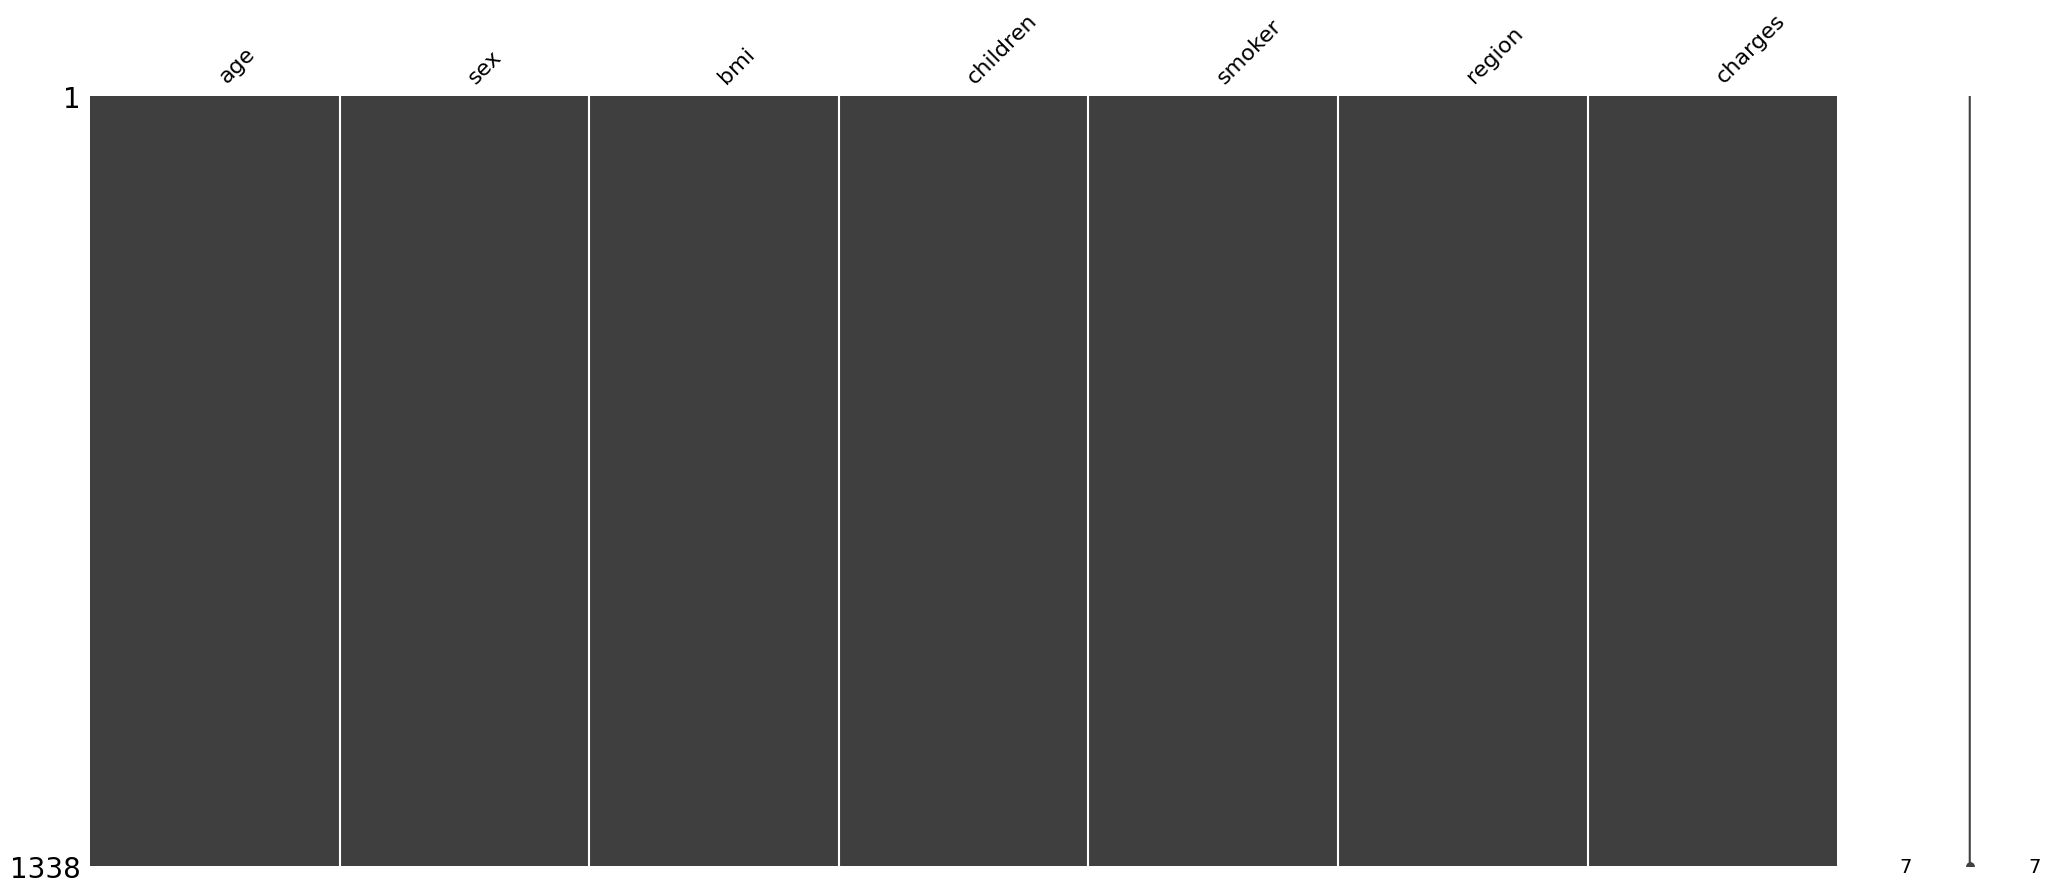

In [21]:
msno.matrix(df)

##  **10. Convertir variables Y a binaria.** No hace falta

## **11. Categorizar Variables String**

In [22]:
categoricas = df.select_dtypes(include=['object', 'category']).columns
print(categoricas)

Index(['sex', 'smoker', 'region'], dtype='object')


In [23]:
mapping_binary = {
    'no': 0,
    'yes': 1
}

df['smoker_encoded'] = df['smoker'].map(mapping_binary)
mapping_binary = {
    'female': 0,
    'male': 1
}

df['sex_encoded'] = df['sex'].map(mapping_binary)
mapping_region = {
    'southeast': 3,
    'southwest': 2,
    'northwest': 1,
    'northeast': 0,
}
df['region_encoded'] = df['region'].map(mapping_region)

## **12. Borrar las categorías que estaban en String**


In [24]:
df.drop(['sex', 'region', 'smoker'], axis=1, inplace=True)

## **13. Hacer Train-Split**

In [25]:
X = df.drop('charges',axis=1)
y = df['charges']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
X_train.columns

Index(['age', 'bmi', 'children', 'smoker_encoded', 'sex_encoded',
       'region_encoded'],
      dtype='object')

In [28]:
X_train.shape

(1070, 6)

## **14. Imputar** No hace falta

<Axes: >

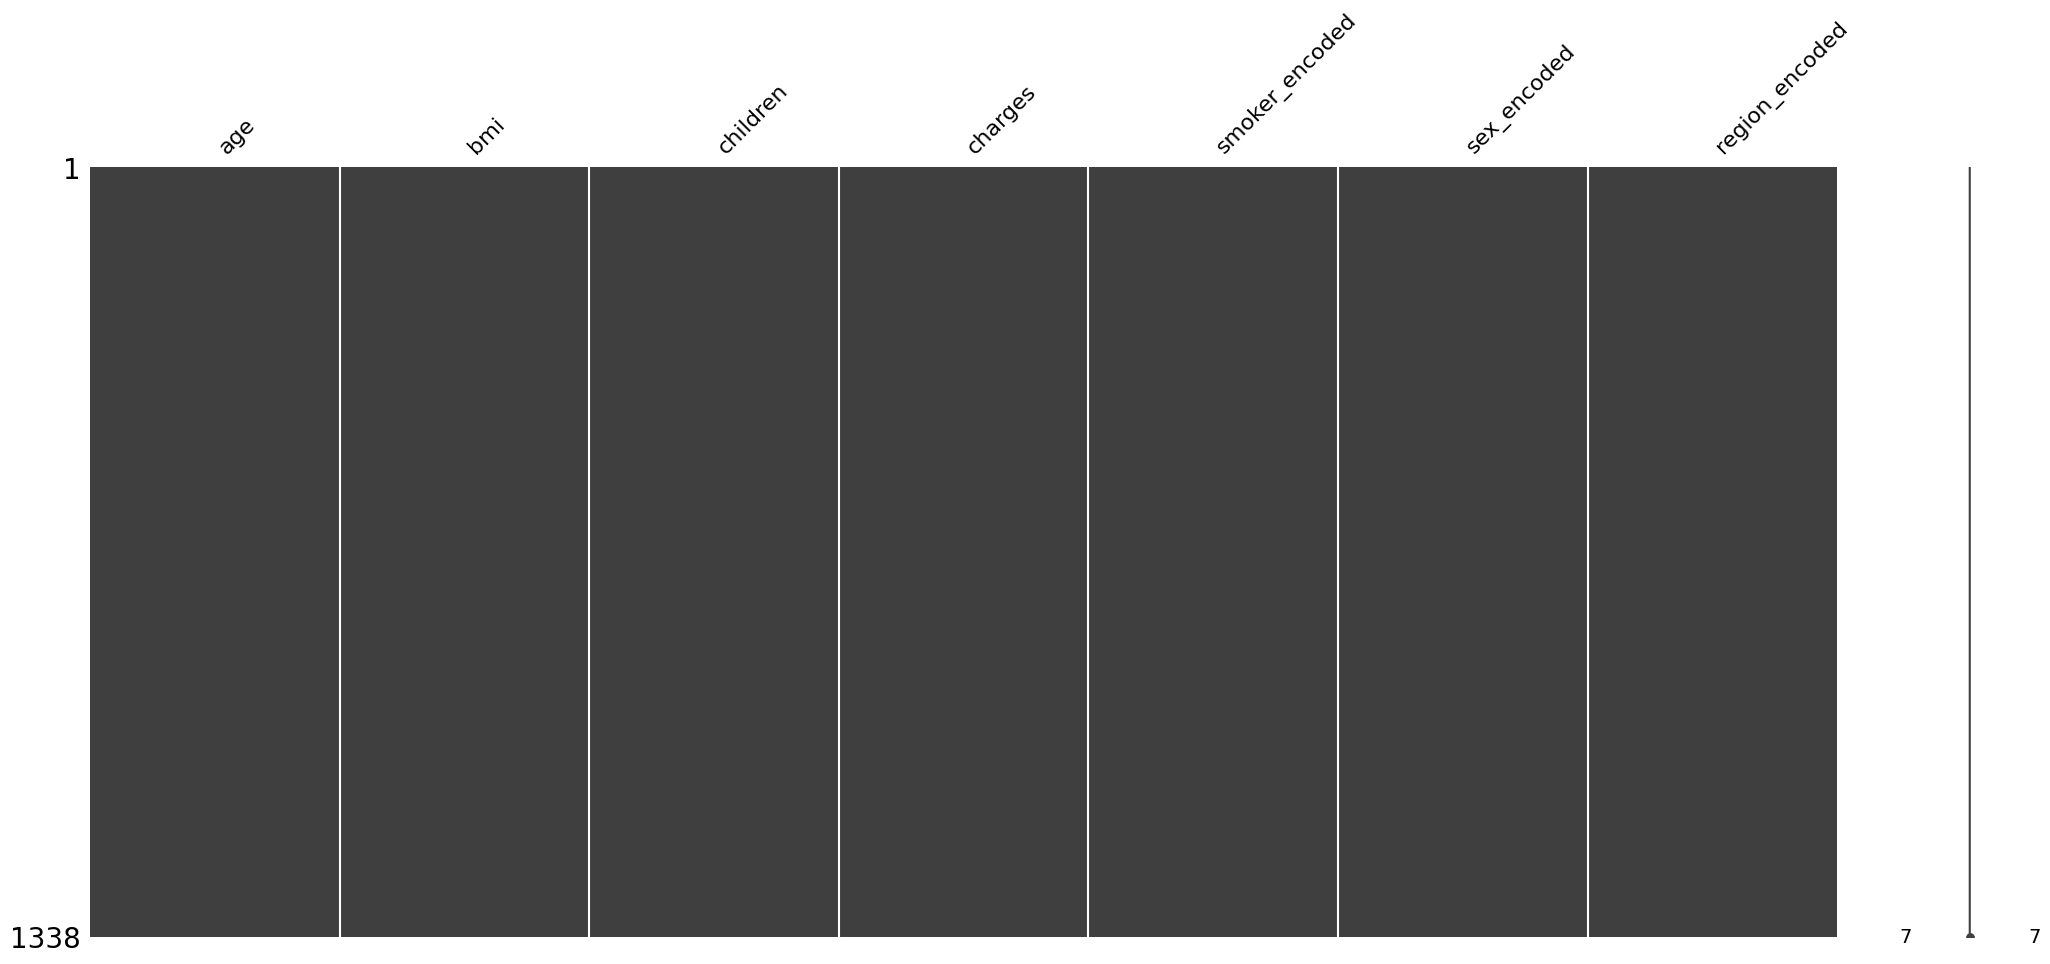

In [29]:
msno.matrix(df)

## **15.Outliers**

In [30]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1070.00,39.36,14.07,18.00,27.00,39.50,51.00,64.00
bmi,1070.00,30.56,6.04,15.96,26.20,30.21,34.50,53.13
children,1070.00,1.11,1.22,0.00,0.00,1.00,2.00,5.00
smoker_encoded,1070.00,0.21,0.40,0.00,0.00,0.00,0.00,1.00
sex_encoded,1070.00,0.51,0.50,0.00,0.00,1.00,1.00,1.00
region_encoded,1070.00,1.53,1.13,0.00,1.00,2.00,3.00,3.00


In [31]:
iso = IsolationForest(random_state=123)
df_num = X_train.copy()
df_num['outlier_flag'] = iso.fit_predict(X_train)

In [32]:
df_num['outlier_flag'].value_counts()

,count
outlier_flag,
-1,624
1,446


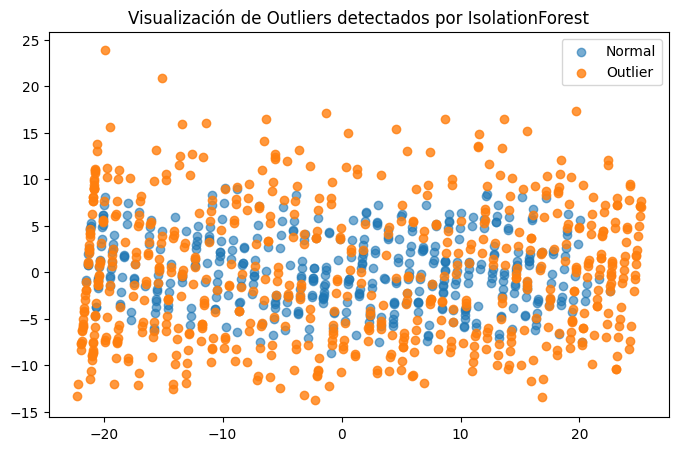

In [84]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

df_plot = pd.DataFrame({
    'PC1': X_pca[:, 0],
    'PC2': X_pca[:, 1],
    'outlier_flag': df_num['outlier_flag']
})

plt.figure(figsize=(8,5))
plt.scatter(df_plot[df_plot['outlier_flag'] == 1]['PC1'],
            df_plot[df_plot['outlier_flag'] == 1]['PC2'],
            label='Normal', alpha=0.6)

plt.scatter(df_plot[df_plot['outlier_flag'] == -1]['PC1'],
            df_plot[df_plot['outlier_flag'] == -1]['PC2'],
            label='Outlier', alpha=0.8)

plt.legend()
plt.title("Visualización de Outliers detectados por IsolationForest")
plt.show()

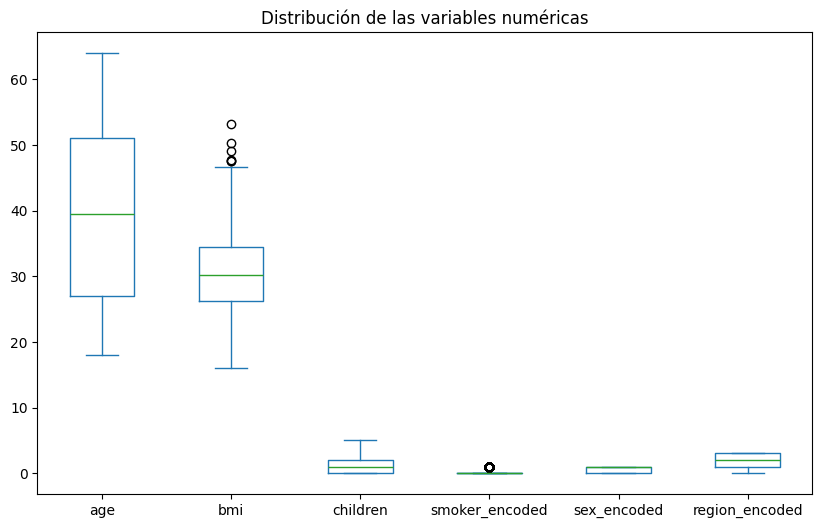

In [85]:
df_num.iloc[:, :-1].plot(kind='box', figsize=(10,6))
plt.title("Distribución de las variables numéricas")
plt.show()

Se ve que donde hay MAS OUTLIERS es en BMI

## **16.Selección de características**

Método 1: Feature importance de RF

In [33]:
# Entrenamiento de RF
model = RandomForestRegressor(random_state=42,n_jobs=-1).fit(X_train, y_train)

In [34]:
# Importancia de características
importances = model.feature_importances_/model.feature_importances_.sum()*100

# Convertir a DataFrame
df_rf_imp = pd.DataFrame({'feature': X_train.columns,'rf_importance': importances}).sort_values(by='rf_importance', ascending=False)

# Calculamos la importancia acumulada
df_rf_imp['rf_importance_acum'] = df_rf_imp['rf_importance'].cumsum()

In [35]:
df_rf_imp

,feature,rf_importance,rf_importance_acum
3,smoker_encoded,60.86,60.86
1,bmi,21.58,82.44
0,age,13.46,95.90
2,children,2.03,97.93
5,region_encoded,1.42,99.35
4,sex_encoded,0.65,100.00


Método 2: Permutation/Shuffle importance

In [36]:
# Para esta técnica y la de shap se necesita conjunto de validación
X_train1, X_val, y_train1, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Ajustamos el modelo
model_xgb = XGBRegressor(objective='reg:squarederror', random_state=42).fit(X_train1, y_train1)

In [37]:
# Realizamos 10 permutaciones por cada característica
perm = permutation_importance(model_xgb, X_val, y_val, n_repeats=10, random_state=42, n_jobs=-1, scoring='neg_mean_absolute_percentage_error')

In [38]:
df_perm_imp = pd.DataFrame({'feature': X_train.columns, 'perm_imp': perm.importances_mean*100}).sort_values('perm_imp', ascending=False)
df_perm_imp

,feature,perm_imp
3,smoker_encoded,80.87
0,age,51.90
2,children,13.43
1,bmi,4.53
5,region_encoded,2.80
4,sex_encoded,0.15


Método 3: SHAP

In [39]:
# Ajustamos el modelo
model_lgbm = lgb.LGBMRegressor(random_state=42, n_jobs=-1).fit(X_train1, y_train1)

explainer = shap.Explainer(model_lgbm, X_val)   # usa el mismo X_val
shap_vals = explainer(X_val).values

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016034 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 317
[LightGBM] [Info] Number of data points in the train set: 856, number of used features: 6
[LightGBM] [Info] Start training from score 13185.568183
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


In [40]:
imp_shap = np.abs(shap_vals).mean(axis=0)
imp_shap_pct = imp_shap/imp_shap.sum()*100
df_shap_imp = pd.DataFrame({"feature": X_val.columns, "shap_imp": imp_shap_pct}).sort_values('shap_imp', ascending=False)
df_shap_imp

,feature,shap_imp
3,smoker_encoded,54.15
0,age,20.26
1,bmi,16.37
2,children,4.22
5,region_encoded,3.22
4,sex_encoded,1.79


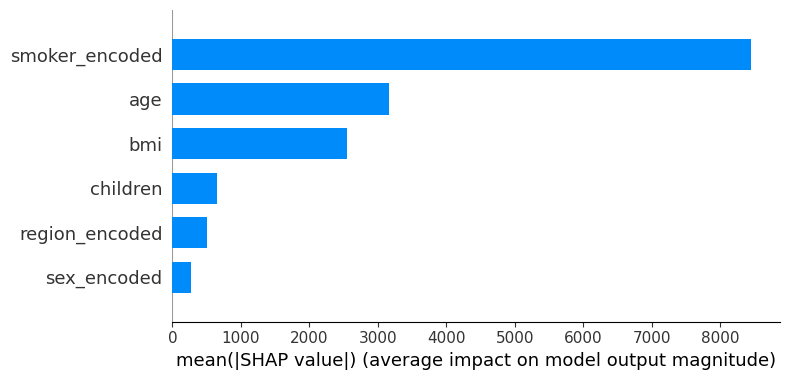

In [41]:
# --- SHAP Summary Bar Plot ---
shap.summary_plot(shap_vals, X_val, plot_type="bar")

Unión 3 métodos

In [42]:
df_importances = (
    df_rf_imp
    .merge(df_perm_imp, on='feature', how='outer')
    .merge(df_shap_imp, on='feature', how='outer')
).sort_values('rf_importance', ascending=False)
df_importances

,feature,rf_importance,rf_importance_acum,perm_imp,shap_imp
5,smoker_encoded,60.86,60.86,80.87,54.15
1,bmi,21.58,82.44,4.53,16.37
0,age,13.46,95.90,51.90,20.26
2,children,2.03,97.93,13.43,4.22
3,region_encoded,1.42,99.35,2.80,3.22
4,sex_encoded,0.65,100.00,0.15,1.79


In [43]:
df_filt = df_importances[(df_importances['rf_importance']>=1)&(df_importances['perm_imp']>=1)&(df_importances['shap_imp']>=1)]
df_filt

,feature,rf_importance,rf_importance_acum,perm_imp,shap_imp
5,smoker_encoded,60.86,60.86,80.87,54.15
1,bmi,21.58,82.44,4.53,16.37
0,age,13.46,95.90,51.90,20.26
2,children,2.03,97.93,13.43,4.22
3,region_encoded,1.42,99.35,2.80,3.22


## **17. Medir correlación de Variables**

In [44]:
features = df_filt['feature']
features

,feature
5,smoker_encoded
1,bmi
0,age
2,children
3,region_encoded


In [45]:
from statsmodels.tools.tools import add_constant

X_vif = add_constant(X_train[features])

vif = pd.Series([variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])],index=X_vif.columns)
vif = vif.drop("const")
vif

,0
smoker_encoded,1.00
bmi,1.09
age,1.02
children,1.00
region_encoded,1.07


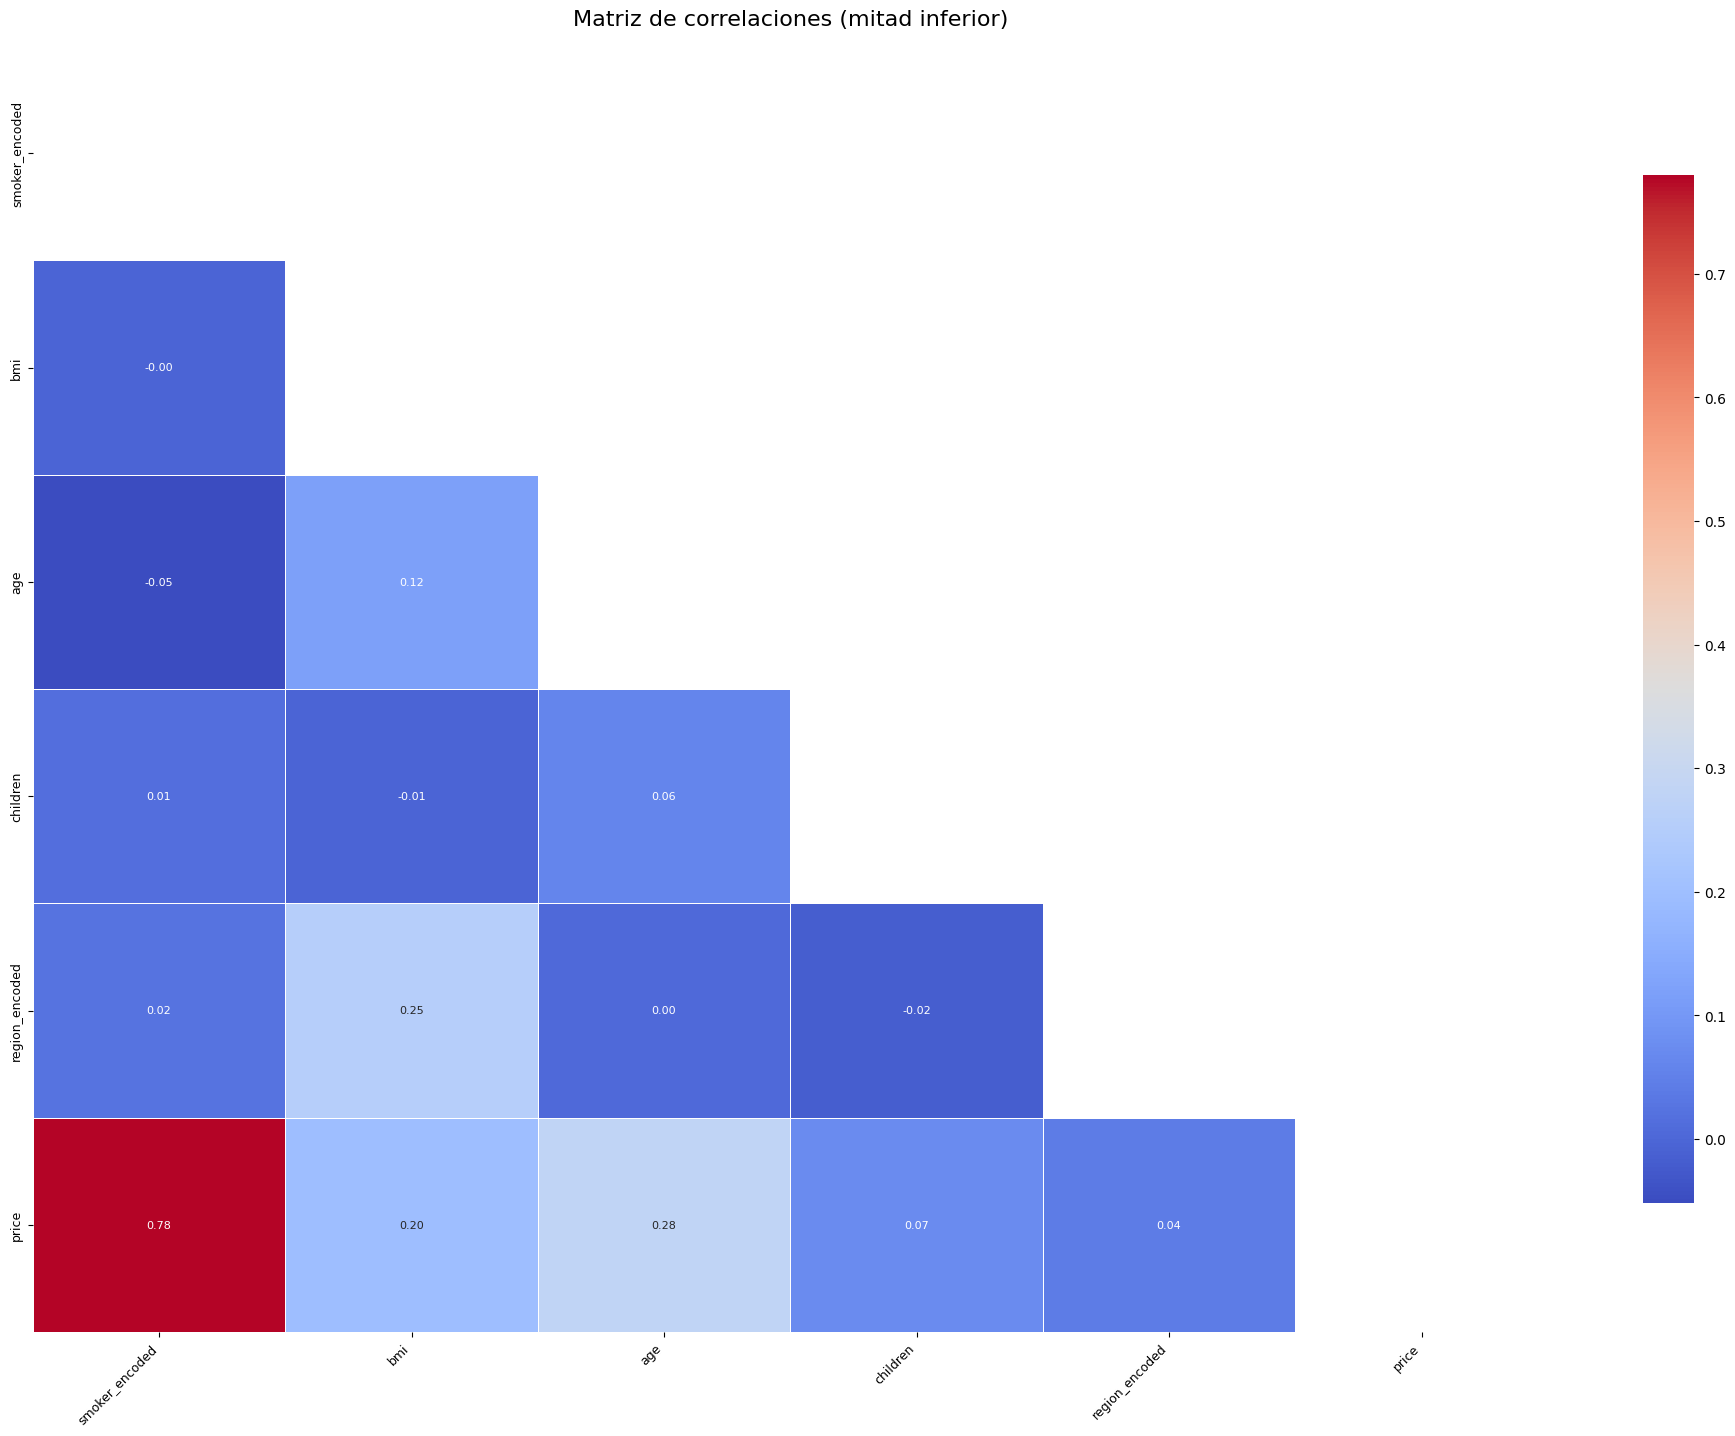

In [46]:
X_copy = X_train[features].copy()
X_copy['price'] = y_train
corr = X_copy.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(20, 15))
sns.heatmap(
    corr, mask=mask, cmap='coolwarm',
    annot=True, fmt=".2f", linewidths=.5,
    cbar_kws={"shrink": .8},
    annot_kws={"size": 8}
)
plt.title("Matriz de correlaciones (mitad inferior)", fontsize=16, pad=15)
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(fontsize=9)
plt.tight_layout(pad=3.0)
plt.show()

## **18.Cross_Validation** Observamos No hay correlación Significativa entre Variables.

In [47]:
# Versión 1: Realizar cross_validation con todas las características que son candidatas
cv_results1 = cross_val_score(RandomForestRegressor(random_state=42,n_jobs=-1), X_train[features], y_train, cv=3, scoring='neg_mean_absolute_percentage_error')

In [48]:
cv_results1.mean()*-1

np.float64(0.35541871144076875)

## **19. Modelado con las Características Seleccionadas**

In [49]:
# Selecciona la caracteristicas con las que hemos determinado que vamos a proseguir el análisis
X_train_sel = X_train[features]
X_test_sel = X_test[features]

In [50]:
X_train_sel.describe().T

,count,mean,std,min,25%,50%,75%,max
smoker_encoded,1070.00,0.21,0.40,0.00,0.00,0.00,0.00,1.00
bmi,1070.00,30.56,6.04,15.96,26.20,30.21,34.50,53.13
age,1070.00,39.36,14.07,18.00,27.00,39.50,51.00,64.00
children,1070.00,1.11,1.22,0.00,0.00,1.00,2.00,5.00
region_encoded,1070.00,1.53,1.13,0.00,1.00,2.00,3.00,3.00


## **20. Gráfico de las Variables**

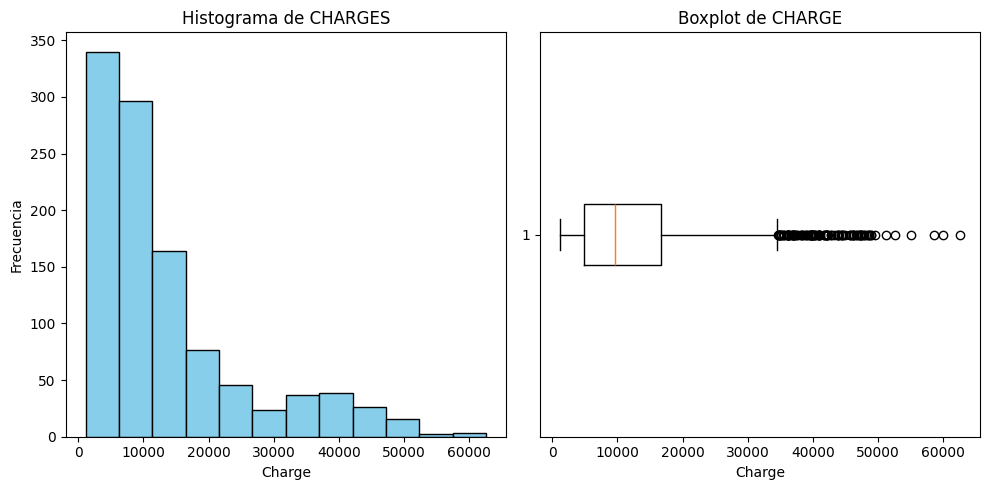

In [51]:
# Crear una figura con dos subplots (uno para el histograma y otro para el boxplot)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Crear un histograma en el primer subplot
ax[0].hist(y_train, bins='sturges', color='skyblue', edgecolor='black')
ax[0].set_title('Histograma de CHARGES')
ax[0].set_xlabel('Charge')
ax[0].set_ylabel('Frecuencia')

# Crear un boxplot en el segundo subplot
ax[1].boxplot(y_train, vert=False)
ax[1].set_title('Boxplot de CHARGE')
ax[1].set_xlabel('Charge')

# Mostrar la figura
plt.tight_layout()
plt.show()

In [52]:
y_train.skew()

np.float64(1.5154267353397535)

In [53]:
y_train.describe()

,charges
count,1070.00
mean,13346.09
std,12019.51
min,1121.87
25%,4897.67
50%,9575.44
75%,16746.66
max,62592.87


## **21. Hacemos Logaritmo de la Variable Y** Para eliminar Sesgo

In [54]:
# Transformamos la variable respuesta en escala logarítmica
y_train = np.log(y_train)
y_test = np.log(y_test)

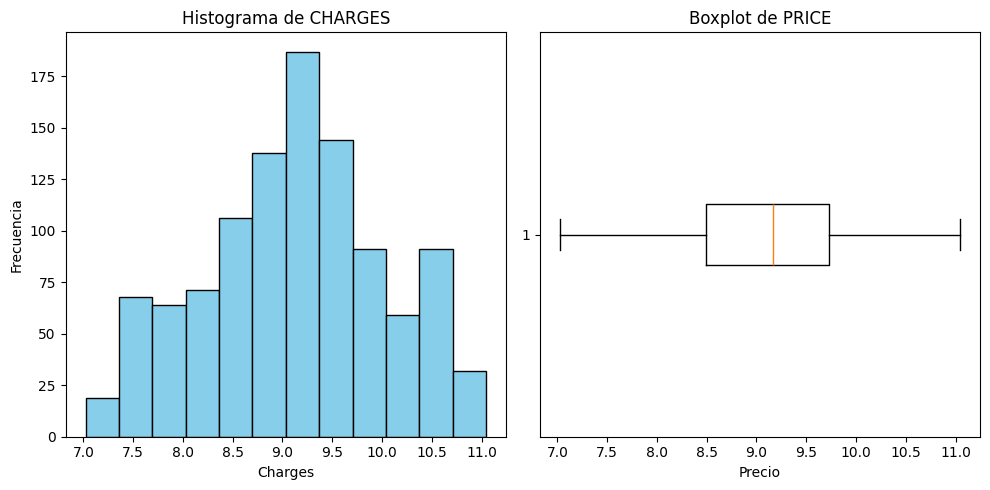

In [55]:
# Crear una figura con dos subplots (uno para el histograma y otro para el boxplot)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Crear un histograma en el primer subplot
ax[0].hist(y_train, bins='sturges', color='skyblue', edgecolor='black')
ax[0].set_title('Histograma de CHARGES')
ax[0].set_xlabel('Charges')
ax[0].set_ylabel('Frecuencia')

# Crear un boxplot en el segundo subplot
ax[1].boxplot(y_train, vert=False)
ax[1].set_title('Boxplot de PRICE')
ax[1].set_xlabel('Precio')

# Mostrar la figura
plt.tight_layout()
plt.show()

## **22.Escalar los datos de la variable X**

In [56]:
scaler = StandardScaler()

X_train_sc = scaler.fit_transform(X_train_sel)
X_test_sc = scaler.transform(X_test_sel)

In [57]:
df_plot = X_train_sel.copy()
df_plot['charges'] = y_train.values

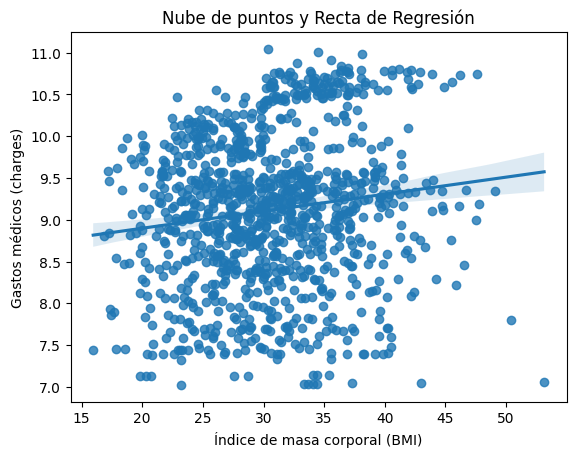

In [58]:
sns.regplot(x='bmi', y='charges', data=df_plot)
plt.title("Nube de puntos y Recta de Regresión")
plt.xlabel("Índice de masa corporal (BMI)")
plt.ylabel("Gastos médicos (charges)")
plt.show()

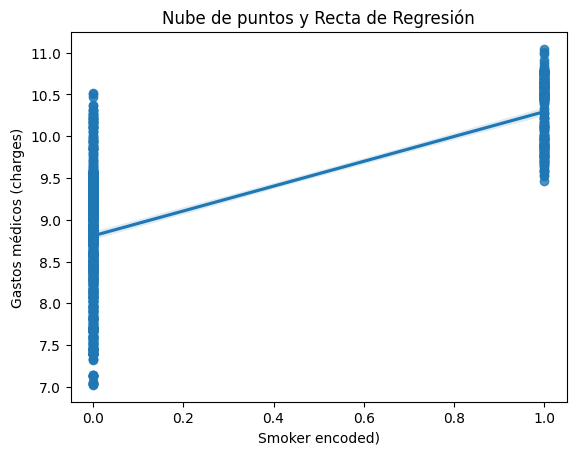

In [59]:
sns.regplot(x='smoker_encoded', y='charges', data=df_plot)
plt.title("Nube de puntos y Recta de Regresión")
plt.xlabel("Smoker encoded)")
plt.ylabel("Gastos médicos (charges)")
plt.show()

## **23.Entrenar Modelo**

In [60]:
X_train_const = sm.add_constant(X_train_sel)

# 2️⃣ creamos el modelo
model = sm.OLS(y_train, X_train_const)

# 3️⃣ entrenamos el modelo
results = model.fit()

# 4️⃣ mostramos el resumen
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.754
Method:                 Least Squares   F-statistic:                     657.1
Date:                Wed, 03 Dec 2025   Prob (F-statistic):          2.91e-322
Time:                        10:17:39   Log-Likelihood:                -665.43
No. Observations:                1070   AIC:                             1343.
Df Residuals:                    1064   BIC:                             1373.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              7.0007      0.079     88.

## **24. Analizamos los Residuos**

In [61]:
residuos = results.resid

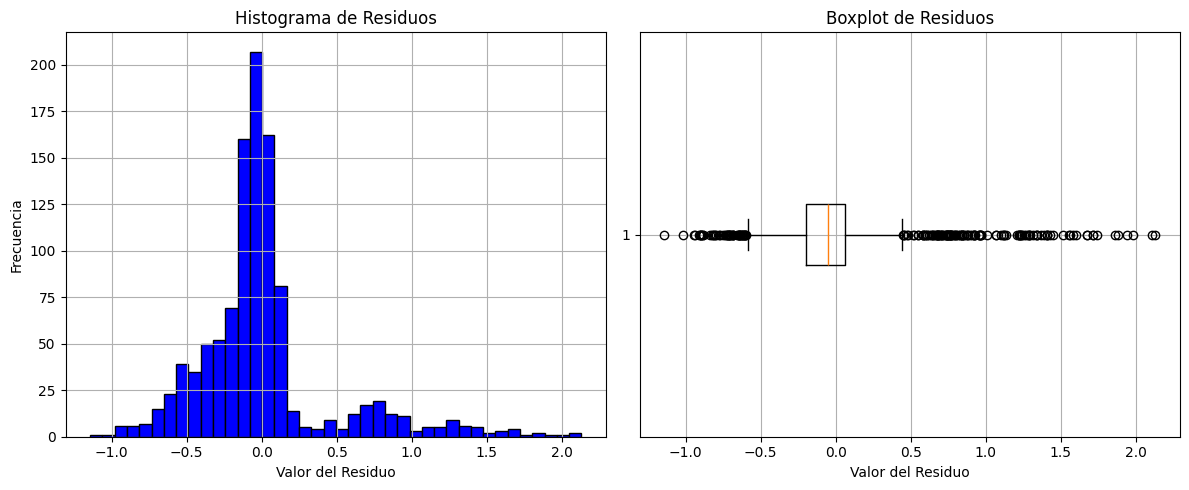

In [62]:
# Crea una figura con dos subgráficos (uno para el histograma y otro para el boxplot)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Histograma de los residuos en el primer subgráfico (ax1)
ax1.hist(residuos, bins=40, color='blue', edgecolor='black')
ax1.set_title('Histograma de Residuos')
ax1.set_xlabel('Valor del Residuo')
ax1.set_ylabel('Frecuencia')
ax1.grid(True)

# Boxplot de los residuos en el segundo subgráfico (ax2)
ax2.boxplot(residuos, vert=False)
ax2.set_title('Boxplot de Residuos')
ax2.set_xlabel('Valor del Residuo')
ax2.grid(True)

# Muestra la figura con ambos gráficos
plt.tight_layout()  # Ajusta los márgenes para evitar superposiciones
plt.show()

## **25.Reentrenar con todo el conjunto de entrenamiento y probar en el test**

## Lasso.Si mejoro apenas mi Rcuadrado

In [63]:
def get_metrics(yhat, y_test, yhat_train, y_train):
  metrics_train = r2_score(y_train, yhat_train), median_absolute_error(y_train, yhat_train), mean_absolute_percentage_error(y_train, yhat_train)*100
  metrics_test = r2_score(y_test, yhat), median_absolute_error(y_test, yhat), mean_absolute_percentage_error(y_test, yhat)*100
  metrics_diff = list(map(lambda x: x[1]-x[0], zip(metrics_train, metrics_test)))
  return pd.DataFrame(data=[metrics_train, metrics_test, metrics_diff], columns=['R2', 'Median AE', 'MAPE'], index=['Train set', 'Test set', 'Diferencia'])

In [64]:
# Entrenamos un modelo LassoCV debemos encontrar un buen valor de alpha (determina la intensidad de la regularización) mediante validación cruzada
m_lasso = LassoCV(alphas=np.logspace(-6, 6, 50), cv=5, random_state=42, n_jobs=-1).fit(X_train_sc, y_train)

# Realizamos predicciones sobre el conjunto de entrenamiento y de testeo
yhat_train_lasso = m_lasso.predict(X_train_sc)
yhat_lasso = m_lasso.predict(X_test_sc)

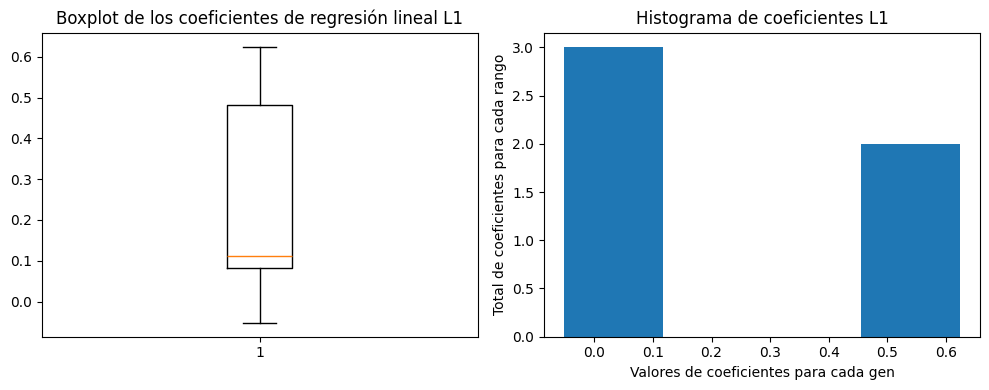

In [65]:
# Graficamos los coeficientes calculados
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.boxplot(m_lasso.coef_)
plt.title('Boxplot de los coeficientes de regresión lineal L1')
plt.subplot(1, 2, 2)
plt.hist(m_lasso.coef_,'sturges')
plt.xlabel('Valores de coeficientes para cada gen')
plt.ylabel('Total de coeficientes para cada rango')
plt.title('Histograma de coeficientes L1')
plt.tight_layout()
plt.show()

In [66]:
print(f'El porcentaje de variables canceladas es: {round(len(m_lasso.coef_[np.abs(m_lasso.coef_)==0])/len(m_lasso.coef_)*100,2)}%')
print(f'El modelo utiliza {len(m_lasso.coef_[np.abs(m_lasso.coef_)>0])} variables.')

El porcentaje de variables canceladas es: 0.0%
El modelo utiliza 5 variables.


In [67]:
get_metrics(yhat_lasso, y_test, yhat_train_lasso, y_train)

,R2,Median AE,MAPE
Train set,0.76,0.13,3.11
Test set,0.80,0.15,3.02
Diferencia,0.05,0.01,-0.08


## Ridge. Si mejoro apenas mi Rcuadrado

In [68]:
# Entrenamos un modelo LassoCV
m_ridge = RidgeCV(alphas=np.logspace(-6, 6, 50), cv=5).fit(X_train_sc, y_train)

# Realizamos predicciones sobre el conjunto de entrenamiento y de testeo
yhat_train_ridge = m_ridge.predict(X_train_sc)
yhat_ridge = m_ridge.predict(X_test_sc)

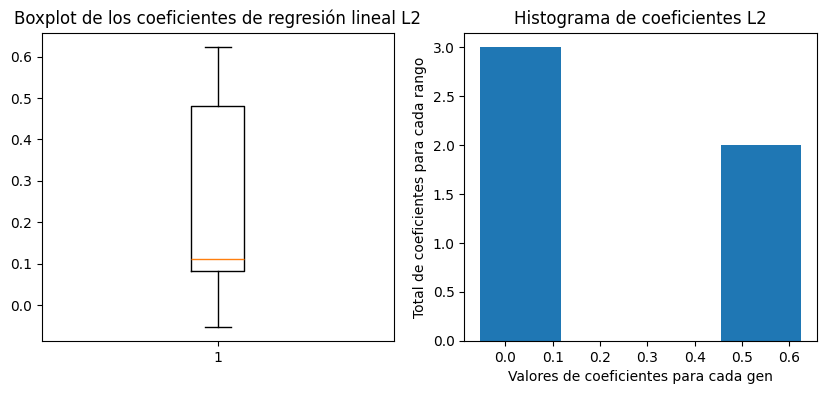

In [69]:
# Graficamos los coeficientes calculados
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.boxplot(m_ridge.coef_)
plt.title('Boxplot de los coeficientes de regresión lineal L2')
plt.subplot(1, 2, 2)
plt.hist(m_ridge.coef_,'sturges')
plt.xlabel('Valores de coeficientes para cada gen')
plt.ylabel('Total de coeficientes para cada rango')
plt.title('Histograma de coeficientes L2')
plt.show()

In [70]:
print(f'El porcentaje de variables canceladas es: {round(len(m_ridge.coef_[np.abs(m_ridge.coef_)==0])/len(m_ridge.coef_)*100,2)}%')
print(f'El modelo utiliza {len(m_ridge.coef_[np.abs(m_ridge.coef_)>0])} variables.')

El porcentaje de variables canceladas es: 0.0%
El modelo utiliza 5 variables.


In [71]:
get_metrics(yhat_ridge, y_test, yhat_train_ridge, y_train)

,R2,Median AE,MAPE
Train set,0.76,0.13,3.11
Test set,0.80,0.15,3.03
Diferencia,0.05,0.01,-0.08


## **26. Incluir Columna Sex_Encoded** No mejoro  mi R al cuadrado. Sex Enconded no estaba incluida porque la quite a partir de mi Selección de Características del MODELO

---



In [72]:
df_filt = df_importances[(df_importances['rf_importance']>=0.5)&(df_importances['perm_imp']>=0.1)&(df_importances['shap_imp']>=0.5)]
df_filt

,feature,rf_importance,rf_importance_acum,perm_imp,shap_imp
5,smoker_encoded,60.86,60.86,80.87,54.15
1,bmi,21.58,82.44,4.53,16.37
0,age,13.46,95.90,51.90,20.26
2,children,2.03,97.93,13.43,4.22
3,region_encoded,1.42,99.35,2.80,3.22
4,sex_encoded,0.65,100.00,0.15,1.79


In [73]:
# Versión 1: Realizar cross_validation con todas las características que son candidatas
cv_results1 = cross_val_score(RandomForestRegressor(random_state=42,n_jobs=-1), X_train[features], y_train, cv=3, scoring='neg_mean_absolute_percentage_error')

In [74]:
cv_results1.mean()*-1

np.float64(0.025640169977434003)

In [75]:
features = df_filt['feature']
features

,feature
5,smoker_encoded
1,bmi
0,age
2,children
3,region_encoded
4,sex_encoded


In [76]:
from statsmodels.tools.tools import add_constant

X_vif = add_constant(X_train[features])

vif = pd.Series([variance_inflation_factor(X_vif.values, i) for i in range(X_vif.shape[1])],index=X_vif.columns)
vif = vif.drop("const")
vif

,0
smoker_encoded,1.01
bmi,1.09
age,1.02
children,1.00
region_encoded,1.07
sex_encoded,1.01


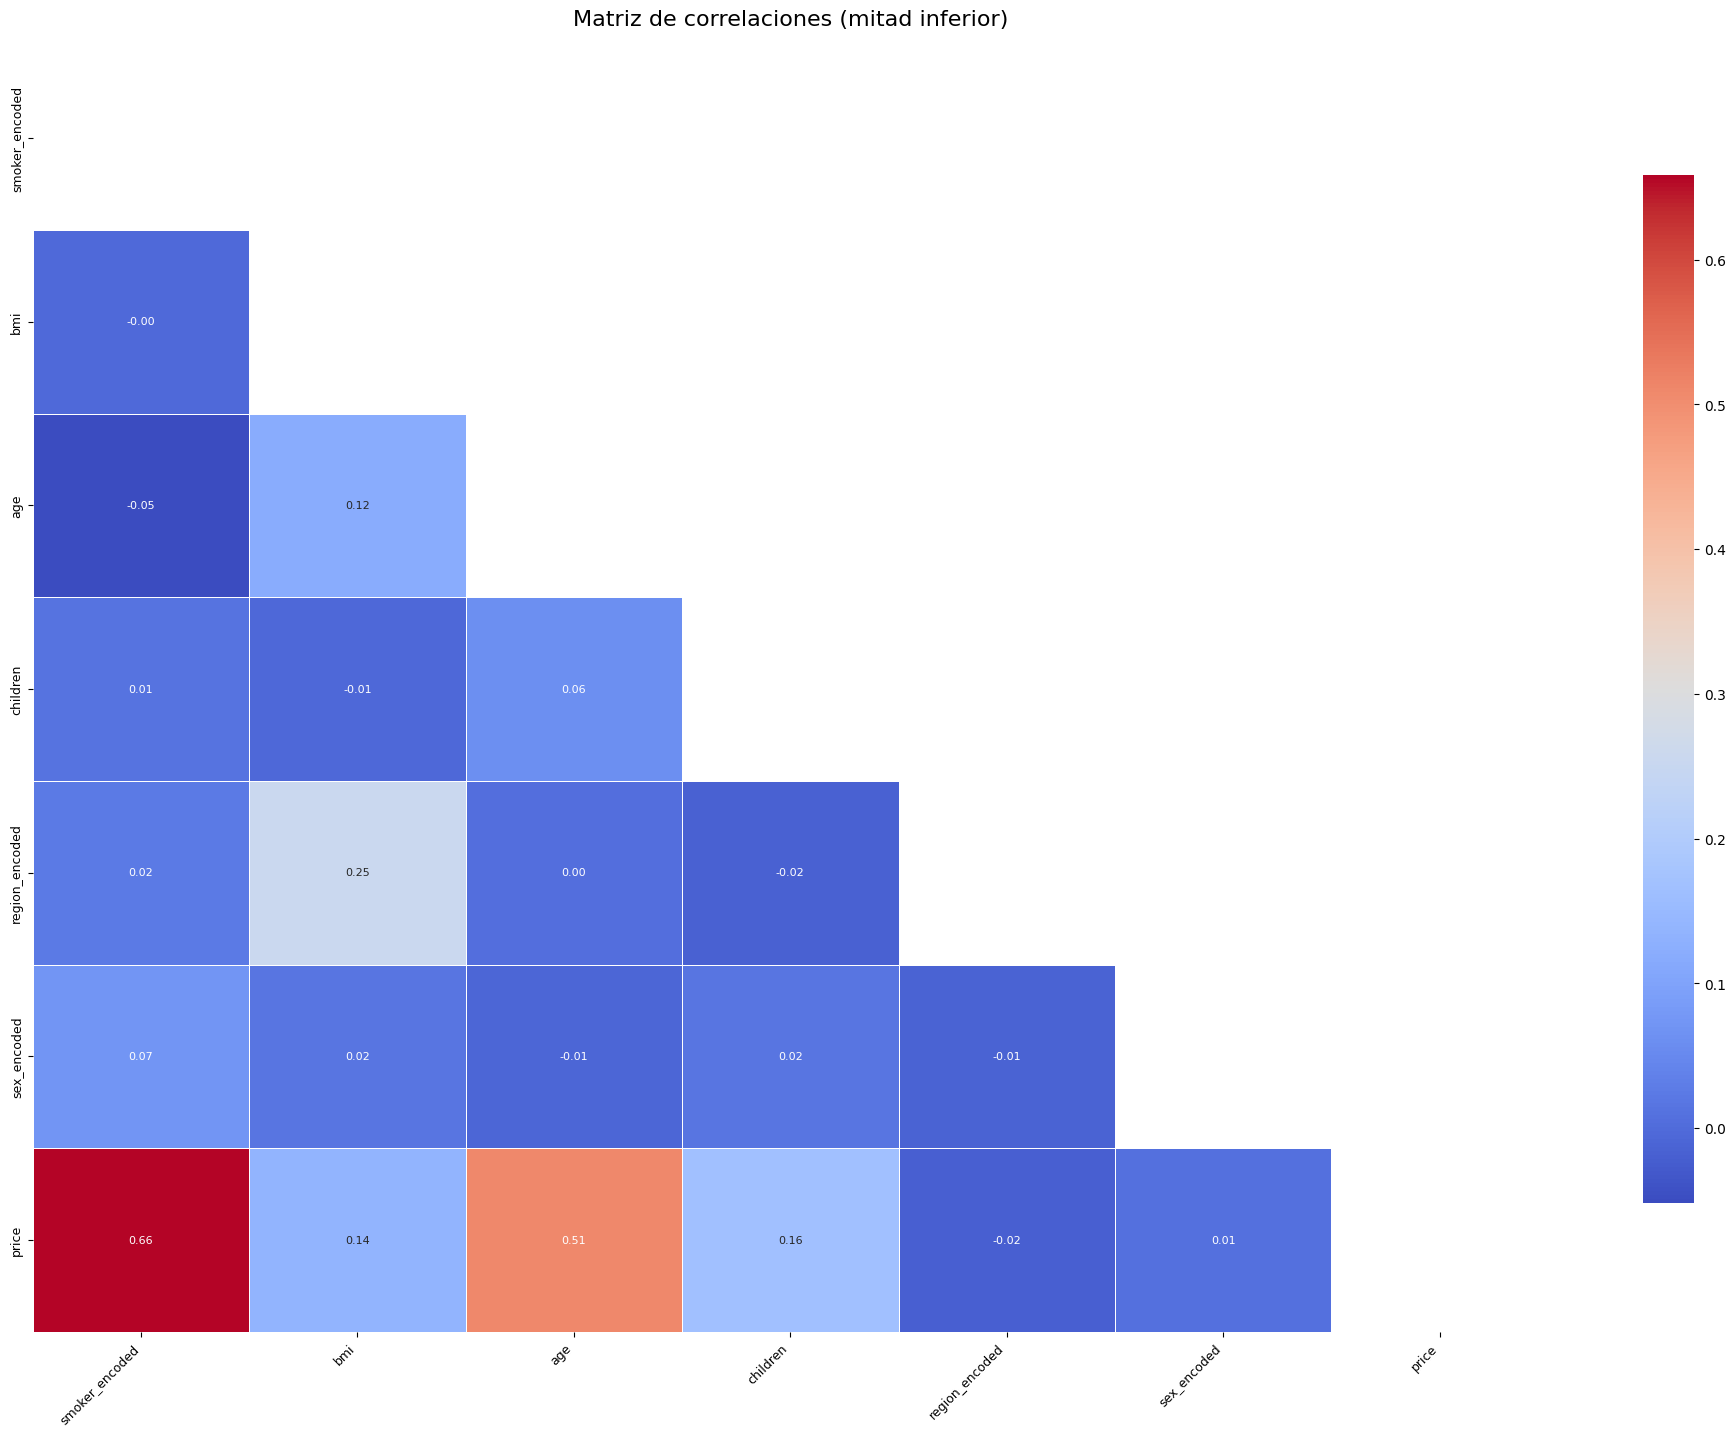

In [77]:
X_copy = X_train[features].copy()
X_copy['price'] = y_train
corr = X_copy.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(20, 15))
sns.heatmap(
    corr, mask=mask, cmap='coolwarm',
    annot=True, fmt=".2f", linewidths=.5,
    cbar_kws={"shrink": .8},
    annot_kws={"size": 8}
)
plt.title("Matriz de correlaciones (mitad inferior)", fontsize=16, pad=15)
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(fontsize=9)
plt.tight_layout(pad=3.0)
plt.show()

In [78]:
# Selecciona la caracteristicas con las que hemos determinado que vamos a proseguir el análisis
X_train_sel = X_train[features]
X_test_sel = X_test[features]

In [79]:
X_train_sel.describe().T

,count,mean,std,min,25%,50%,75%,max
smoker_encoded,1070.00,0.21,0.40,0.00,0.00,0.00,0.00,1.00
bmi,1070.00,30.56,6.04,15.96,26.20,30.21,34.50,53.13
age,1070.00,39.36,14.07,18.00,27.00,39.50,51.00,64.00
children,1070.00,1.11,1.22,0.00,0.00,1.00,2.00,5.00
region_encoded,1070.00,1.53,1.13,0.00,1.00,2.00,3.00,3.00
sex_encoded,1070.00,0.51,0.50,0.00,0.00,1.00,1.00,1.00


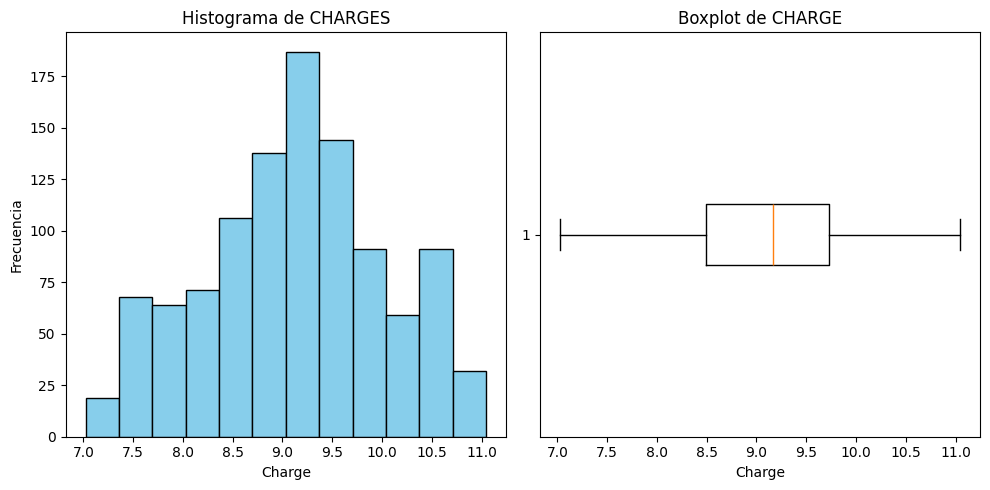

In [91]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Crear un histograma en el primer subplot
ax[0].hist(y_train, bins='sturges', color='skyblue', edgecolor='black')
ax[0].set_title('Histograma de CHARGES')
ax[0].set_xlabel('Charge')
ax[0].set_ylabel('Frecuencia')

# Crear un boxplot en el segundo subplot
ax[1].boxplot(y_train, vert=False)
ax[1].set_title('Boxplot de CHARGE')
ax[1].set_xlabel('Charge')

# Mostrar la figura
plt.tight_layout()
plt.show()

In [96]:
y_train.skew()

np.float64(-0.12416288648898337)

In [97]:
# Transformamos la variable respuesta en escala logarítmica
y_train = np.log(y_train)
y_test = np.log(y_test)

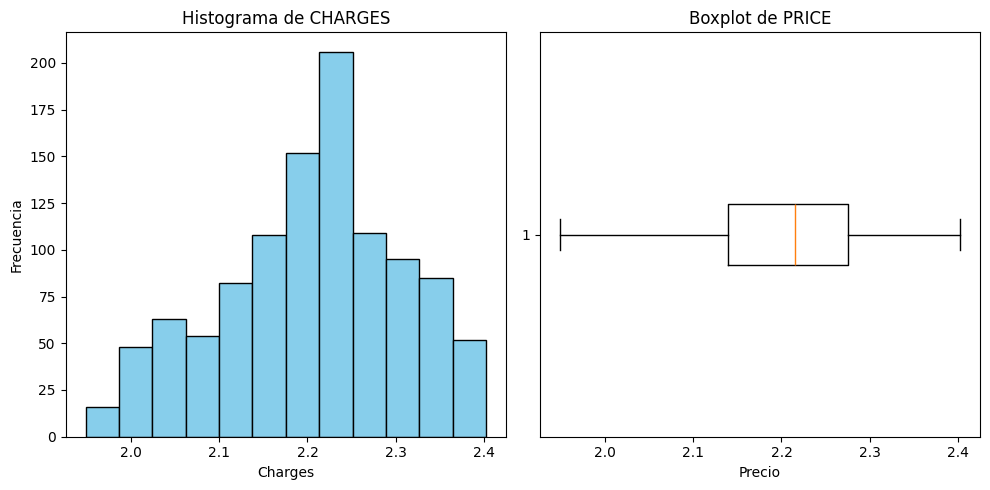

In [98]:
# Crear una figura con dos subplots (uno para el histograma y otro para el boxplot)
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Crear un histograma en el primer subplot
ax[0].hist(y_train, bins='sturges', color='skyblue', edgecolor='black')
ax[0].set_title('Histograma de CHARGES')
ax[0].set_xlabel('Charges')
ax[0].set_ylabel('Frecuencia')

# Crear un boxplot en el segundo subplot
ax[1].boxplot(y_train, vert=False)
ax[1].set_title('Boxplot de PRICE')
ax[1].set_xlabel('Precio')

# Mostrar la figura
plt.tight_layout()
plt.show()

In [99]:
scaler = StandardScaler()

X_train_sc = scaler.fit_transform(X_train_sel)
X_test_sc = scaler.transform(X_test_sel)

In [100]:
df_plot = X_train_sel.copy()
df_plot['charges'] = y_train.values

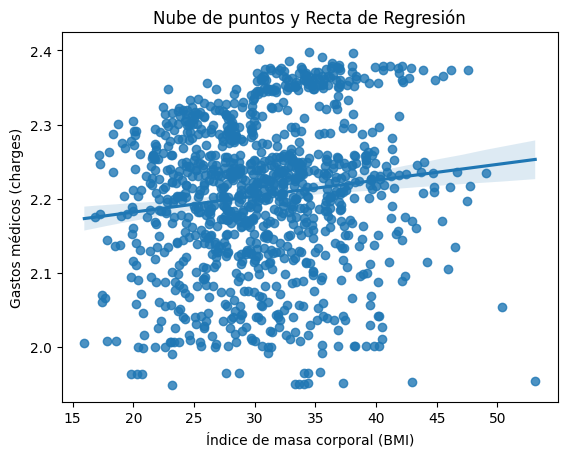

In [101]:
sns.regplot(x='bmi', y='charges', data=df_plot)
plt.title("Nube de puntos y Recta de Regresión")
plt.xlabel("Índice de masa corporal (BMI)")
plt.ylabel("Gastos médicos (charges)")
plt.show()

In [102]:
X_train_const = sm.add_constant(X_train_sel)

# 2️⃣ creamos el modelo
model = sm.OLS(y_train, X_train_const)

# 3️⃣ entrenamos el modelo
results = model.fit()

# 4️⃣ mostramos el resumen
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     523.9
Date:                Wed, 03 Dec 2025   Prob (F-statistic):          2.46e-313
Time:                        11:35:03   Log-Likelihood:                 1664.2
No. Observations:                1070   AIC:                            -3314.
Df Residuals:                    1063   BIC:                            -3279.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.9729      0.009    217.

## **27.Quitar Outliers en BMI** No mejoro mi R al cuadrado. Al parecer la relación entre BMI y mi variable dependiente no es lineal.

In [87]:
Q1 = X_train['bmi'].quantile(0.25)
Q3 = X_train['bmi'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Filtrar X_train
mask = (X_train['bmi'] >= lower) & (X_train['bmi'] <= upper)

X_train_clean = X_train[mask]
y_train_clean = y_train[mask]

In [88]:
# Agregar la constante
X_train_const = sm.add_constant(X_train_clean)

# Crear el modelo
model = sm.OLS(y_train_clean, X_train_const)

# Entrenar
results = model.fit()

# Mostrar resumen
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     547.7
Date:                Wed, 03 Dec 2025   Prob (F-statistic):          3.62e-320
Time:                        11:03:36   Log-Likelihood:                -656.77
No. Observations:                1064   AIC:                             1328.
Df Residuals:                    1057   BIC:                             1362.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              7.0065      0.081     86.